<a href="https://colab.research.google.com/github/Manireddy69/Data-science/blob/main/Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# X = np.random.randint(1,10) # randint generate whole number like 1 to 10
X = 2 * np.random.rand(100,1) #(100,1) genrate matrix with 100 rows and 1  column
y = 4 + 3 * X + np.random.rand(100,1)

In [15]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Normal equation = inv(X.T X) * X.T y

In [20]:
theta_best

array([[4.5295485 ],
       [2.97279883]])

In [24]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict= X_new_b.dot(theta_best)
y_predict

array([[ 4.5295485 ],
       [10.47514616]])

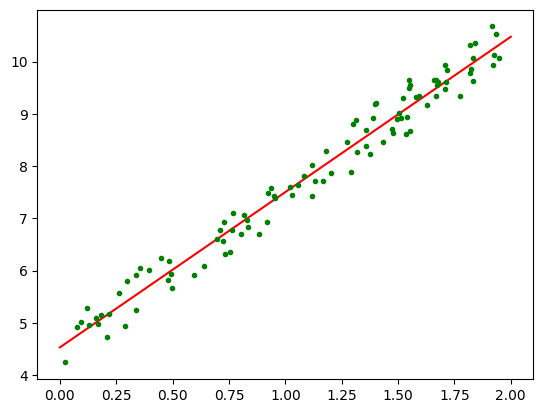

In [27]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'g.')
plt.show()

In [32]:
#using sckit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)  # feed the data to model
lin_reg.intercept_, lin_reg.coef_ # we get the coeff from normal eqn
lin_reg.predict(X_new) #predict the model with new data

array([[ 4.5295485 ],
       [10.47514616]])

In [ ]:
#the problem with linear eqn is more complexity
#so we use optimization

In [44]:
#batch gradient descent
eta= 0.1
n_iterations = 1000
m= 100
theta = np.random.randn(2,1) #(2,1) with 2 rows & 1 column, takes even negative
for iterations in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients


theta

array([[4.5295485 ],
       [2.97279883]])

In [46]:
#stochastic gradient descent
n_epochs = 50
t0 , t1 = 5 , 50
def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index +1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients


theta

array([[4.5029555 ],
       [2.98988042]])

In [53]:
#using sckitlearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty= None, eta0 = 0.1 ) # changed n_iter to max_iter and eta to eta0
sgd_reg.fit(X.reshape(-1, 1), y.ravel()) # Reshape X to be 2D and flatten y for fit

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [54]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-0.42816725]), array([-0.27643412]))

In [80]:
#polynomial Regression
X = 6 * np.random.rand(100,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(100,1)
# plt.plot(X,y, 'b.')
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = poly_features.fit_transform(X)
# plt.plot(X,y,'g.')
# X_poly[0]
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_ , lin_reg.coef_

(array([2.3581471]), array([[1.14949121, 0.49085719]]))

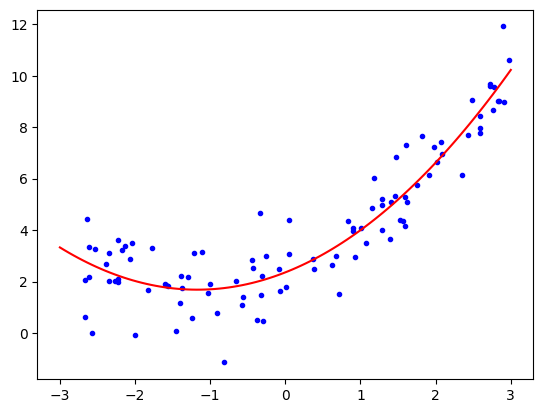

In [86]:
# Generate data points for plotting the polynomial curve
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Plot the original data points
plt.plot(X, y, "b.", label="Data points")

# Plot the polynomial regression line
plt.plot(X_new, y_new, "r-", label="Polynomial Regression")
plt.show()

In [90]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.75677666])

In [92]:
sgd_reg = SGDRegressor(penalty= 'l2')   #penalty hyperparameter sets the type of regularization to use.
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.74144028])

In [93]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=  0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.71813638])